# General Package Imports

In [468]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import collections
import nltk
import wordcloud
import matplotlib.pyplot as plt # we only need pyplot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import random
import re

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [166]:
#read data from the csv file (Abhigyan's CSV file)
data = pd.read_csv("/Users/abhishekvaidyanathan/Desktop/NLP-project1/reviewSelected100.csv")

In [177]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [169]:
data['business_id'].nunique()

153

# Functions Required for each specification

In [255]:
def remove_stopwords(tokenized_sentence):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in tokenized_sentence if not w.lower() in stop_words]
    filtered_sentence = []
    for w in tokenized_sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [256]:
def tokenisation(sentence):
    word_tokens_with_stop = word_tokenize(sentence)
    word_tokens=remove_stopwords(word_tokens_with_stop)
    return word_tokens

In [257]:
def nltk_pos_tagging(sentence):
    tokenised_sentence=tokenisation(sentence)
    Pos_Tag_Sentence=nltk.pos_tag(tokenised_sentence)
    return Pos_Tag_Sentence

In [258]:
def sentence_tokenizer(sentence):
    tokenised_sentence = []
    tokenised_sentence = sent_tokenize(sentence)
    return tokenised_sentence

In [259]:
def tokenize_sentences(sentence_array):
    sentence_tokens = []
    for sentences in sentence_array:
        tokenize_sent = nltk_pos_tagging(sentences)
        sentence_tokens.append(tokenize_sent)
    return sentence_tokens

In [260]:
def count_noun_adjective_pairs(sentence_array):
    count_array = []
    for pos_tags_array in sentence_array:
        pos_tags_count_array = []
        for pos_tags in range(len(pos_tags_array)):
            if ((pos_tags_array[pos_tags][1]) == "NN"):
                for pos_tags_next in range(pos_tags+1,len(pos_tags_array)):
                    if (pos_tags_array[pos_tags_next][1]=="JJ"):
                        pos_tags_count_array.append([pos_tags_array[pos_tags][0],pos_tags_array[pos_tags_next][0]])
        count_array.append([pos_tags_count_array,len(pos_tags_count_array)])

    return count_array

In [343]:
def extract_all_noun_adjective_pairs(noun_adjective_pairs,all_noun_adjective_pairs):
    for all_pairs in noun_adjective_pairs:
        if (all_pairs[0]!=[]):
            all_noun_adjective_pairs.extend(all_pairs[0])

In [344]:
def convert_list_to_tuple(all_noun_adjective_pairs):
    for i in range(len(all_noun_adjective_pairs)):
        all_noun_adjective_pairs[i] = tuple(all_noun_adjective_pairs[i])

    return all_noun_adjective_pairs

In [382]:
def get_most_common_word_pair(all_noun_adjective_pairs_tuple,top_k):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    return (counter.most_common(top_k))

In [381]:
def get_count_for_specific_word_pairs(all_noun_adjective_pairs_tuple,key_value):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    return dict1[key_value]

In [377]:
def get_count_and_common_word_pairs(tuple1,tuple2):
    list1_as_set = set(tuple1)
    intersection = list1_as_set.intersection(tuple2)
    intersection_as_list = list(intersection)
    for common_elements in intersection_as_list:
        count1 = get_count_for_specific_word_pairs(tuple1,common_elements)
        count2 = get_count_for_specific_word_pairs(tuple2,common_elements)
        print("The common element is ",common_elements,". The count from from each of the tuples are: ",str([count1,count2]),".")


In [404]:
def get_top_frequent_pairs_words(data_rating,top_k):
    all_noun_adjective_pairs_rating = []
    data_rating.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
    all_noun_adjective_pairs__rating_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)
    top_frequent_pairs_rating = get_most_common_word_pair(all_noun_adjective_pairs__rating_tuple,top_k)
    return (top_frequent_pairs_rating)

In [442]:
def barplot_for_the_frequent_word_pairs(data,top_k):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    frequency = []
    word_pairs = []
    for i in get_top_frequent_pairs_words(data,top_k):
        frequency.append(str(i[0]))
        word_pairs.append(int(i[1]))
    ax.bar(tuple(frequency),tuple(word_pairs))
    ax.set_ylabel('frequency')
    ax.set_xlabel('Word Pairs')
    ax.set_title('frequence of top '+str(top_k)+' word pairs')
    plt.xticks(rotation='vertical')
    plt.show()

In [455]:
def show_wordclouds(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

# Implementation To Get Noun-Adjective Pairs From 50 Random Reviews Rated 1 

In [185]:
data_rating_1 = data[data['stars']==1]
data_random_new = data_rating_1.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_new_new = data_random_new.sample(50)
data_random_new_new.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
143,Gt5n8PZy1drqXCbwQSqpGA,8E9rT7yUdJxaYGfMd4Yfcw,yAkaDc6MWX3dy8bnEcCrRQ,1,4,0,0,sorry to say but both the food and service are...,2017-06-24 02:05:22
94,oMJSGS16DyCsqgaXQGRZuw,jboKypB_6Ob_3DqijWWjHQ,grvkjaJB9aorAMIjGD6XSg,1,1,0,0,730 start time is such a lie. Still waiting. S...,2017-05-07 01:46:01
106,Pw27QKdkg61kKrTusx6w2Q,U37GhC_YPVwG5pxsLlcCxg,mOzOYgXYOmkdNfZr453PgQ,1,1,0,0,"The food is good, but the service here is awfu...",2018-02-03 23:49:24
40,Ul_LY-O-dtiWtriHGhzfXg,qou3x2QglVBohL1XW1WVcg,JqBtQ1bSynPHE9gbyuSSvA,1,0,0,0,i picked this restaurant for lunch with my wif...,2018-11-02 16:07:39
109,NxQXOH7yFOtWRYhPCSCfzg,BEyHzKs6IL2ZmzLD8gLbag,nN1MXnHFzZh9snkMmdhYrg,1,5,0,3,"First of all, I love blow dry bars. I have rea...",2011-10-14 16:10:13


In [186]:
data_random_new_new.shape

(50, 9)

In [196]:
data_random_new_new['pos_tags'] = data_random_new_new.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)

In [197]:
data_random_new_new.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
143,Gt5n8PZy1drqXCbwQSqpGA,8E9rT7yUdJxaYGfMd4Yfcw,yAkaDc6MWX3dy8bnEcCrRQ,1,4,0,0,sorry to say but both the food and service are...,2017-06-24 02:05:22,"[(sorry, NNS), (say, VBP), (food, NN), (servic..."
94,oMJSGS16DyCsqgaXQGRZuw,jboKypB_6Ob_3DqijWWjHQ,grvkjaJB9aorAMIjGD6XSg,1,1,0,0,730 start time is such a lie. Still waiting. S...,2017-05-07 01:46:01,"[(730, CD), (start, JJ), (time, NN), (lie, NN)..."
106,Pw27QKdkg61kKrTusx6w2Q,U37GhC_YPVwG5pxsLlcCxg,mOzOYgXYOmkdNfZr453PgQ,1,1,0,0,"The food is good, but the service here is awfu...",2018-02-03 23:49:24,"[(The, DT), (food, NN), (good, JJ), (,, ,), (s..."
40,Ul_LY-O-dtiWtriHGhzfXg,qou3x2QglVBohL1XW1WVcg,JqBtQ1bSynPHE9gbyuSSvA,1,0,0,0,i picked this restaurant for lunch with my wif...,2018-11-02 16:07:39,"[(picked, VBN), (restaurant, NN), (lunch, NN),..."
109,NxQXOH7yFOtWRYhPCSCfzg,BEyHzKs6IL2ZmzLD8gLbag,nN1MXnHFzZh9snkMmdhYrg,1,5,0,3,"First of all, I love blow dry bars. I have rea...",2011-10-14 16:10:13,"[(First, RB), (,, ,), (I, PRP), (love, VBP), (..."


In [198]:
data_random_new_new['sentence tokenizer'] = data_random_new_new.apply(lambda row: sentence_tokenizer(row['text']),axis=1)

In [199]:
data_random_new_new.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer
143,Gt5n8PZy1drqXCbwQSqpGA,8E9rT7yUdJxaYGfMd4Yfcw,yAkaDc6MWX3dy8bnEcCrRQ,1,4,0,0,sorry to say but both the food and service are...,2017-06-24 02:05:22,"[(sorry, NNS), (say, VBP), (food, NN), (servic...",[sorry to say but both the food and service ar...
94,oMJSGS16DyCsqgaXQGRZuw,jboKypB_6Ob_3DqijWWjHQ,grvkjaJB9aorAMIjGD6XSg,1,1,0,0,730 start time is such a lie. Still waiting. S...,2017-05-07 01:46:01,"[(730, CD), (start, JJ), (time, NN), (lie, NN)...","[730 start time is such a lie., Still waiting...."
106,Pw27QKdkg61kKrTusx6w2Q,U37GhC_YPVwG5pxsLlcCxg,mOzOYgXYOmkdNfZr453PgQ,1,1,0,0,"The food is good, but the service here is awfu...",2018-02-03 23:49:24,"[(The, DT), (food, NN), (good, JJ), (,, ,), (s...","[The food is good, but the service here is awf..."
40,Ul_LY-O-dtiWtriHGhzfXg,qou3x2QglVBohL1XW1WVcg,JqBtQ1bSynPHE9gbyuSSvA,1,0,0,0,i picked this restaurant for lunch with my wif...,2018-11-02 16:07:39,"[(picked, VBN), (restaurant, NN), (lunch, NN),...",[i picked this restaurant for lunch with my wi...
109,NxQXOH7yFOtWRYhPCSCfzg,BEyHzKs6IL2ZmzLD8gLbag,nN1MXnHFzZh9snkMmdhYrg,1,5,0,3,"First of all, I love blow dry bars. I have rea...",2011-10-14 16:10:13,"[(First, RB), (,, ,), (I, PRP), (love, VBP), (...","[First of all, I love blow dry bars., I have r..."


In [201]:
data_random_new_new["sentence_tokens_pos_tags"] = data_random_new_new.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)

In [202]:
data_random_new_new.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags
143,Gt5n8PZy1drqXCbwQSqpGA,8E9rT7yUdJxaYGfMd4Yfcw,yAkaDc6MWX3dy8bnEcCrRQ,1,4,0,0,sorry to say but both the food and service are...,2017-06-24 02:05:22,"[(sorry, NNS), (say, VBP), (food, NN), (servic...",[sorry to say but both the food and service ar...,"[[(sorry, NNS), (say, VBP), (food, NN), (servi..."
94,oMJSGS16DyCsqgaXQGRZuw,jboKypB_6Ob_3DqijWWjHQ,grvkjaJB9aorAMIjGD6XSg,1,1,0,0,730 start time is such a lie. Still waiting. S...,2017-05-07 01:46:01,"[(730, CD), (start, JJ), (time, NN), (lie, NN)...","[730 start time is such a lie., Still waiting....","[[(730, CD), (start, JJ), (time, NN), (lie, NN..."
106,Pw27QKdkg61kKrTusx6w2Q,U37GhC_YPVwG5pxsLlcCxg,mOzOYgXYOmkdNfZr453PgQ,1,1,0,0,"The food is good, but the service here is awfu...",2018-02-03 23:49:24,"[(The, DT), (food, NN), (good, JJ), (,, ,), (s...","[The food is good, but the service here is awf...","[[(The, DT), (food, NN), (good, JJ), (,, ,), (..."
40,Ul_LY-O-dtiWtriHGhzfXg,qou3x2QglVBohL1XW1WVcg,JqBtQ1bSynPHE9gbyuSSvA,1,0,0,0,i picked this restaurant for lunch with my wif...,2018-11-02 16:07:39,"[(picked, VBN), (restaurant, NN), (lunch, NN),...",[i picked this restaurant for lunch with my wi...,"[[(picked, VBN), (restaurant, NN), (lunch, NN)..."
109,NxQXOH7yFOtWRYhPCSCfzg,BEyHzKs6IL2ZmzLD8gLbag,nN1MXnHFzZh9snkMmdhYrg,1,5,0,3,"First of all, I love blow dry bars. I have rea...",2011-10-14 16:10:13,"[(First, RB), (,, ,), (I, PRP), (love, VBP), (...","[First of all, I love blow dry bars., I have r...","[[(First, RB), (,, ,), (I, PRP), (love, VBP), ..."


In [203]:
data_random_new_new.iloc[0]['sentence_tokens_pos_tags'][1][0][1]

'NN'

In [220]:
data_random_new_new["noun_adjective_pairs"] = data_random_new_new.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags']),axis=1)

In [221]:
data_random_new_new.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags,noun_adjective_pairs
143,Gt5n8PZy1drqXCbwQSqpGA,8E9rT7yUdJxaYGfMd4Yfcw,yAkaDc6MWX3dy8bnEcCrRQ,1,4,0,0,sorry to say but both the food and service are...,2017-06-24 02:05:22,"[(sorry, NNS), (say, VBP), (food, NN), (servic...",[sorry to say but both the food and service ar...,"[[(sorry, NNS), (say, VBP), (food, NN), (servi...","[[[], 0], [[], 0], [[['chicken', 'uncooked'], ..."
94,oMJSGS16DyCsqgaXQGRZuw,jboKypB_6Ob_3DqijWWjHQ,grvkjaJB9aorAMIjGD6XSg,1,1,0,0,730 start time is such a lie. Still waiting. S...,2017-05-07 01:46:01,"[(730, CD), (start, JJ), (time, NN), (lie, NN)...","[730 start time is such a lie., Still waiting....","[[(730, CD), (start, JJ), (time, NN), (lie, NN...","[[[], 0], [[], 0], [[], 0], [[], 0], [[], 0]]"
106,Pw27QKdkg61kKrTusx6w2Q,U37GhC_YPVwG5pxsLlcCxg,mOzOYgXYOmkdNfZr453PgQ,1,1,0,0,"The food is good, but the service here is awfu...",2018-02-03 23:49:24,"[(The, DT), (food, NN), (good, JJ), (,, ,), (s...","[The food is good, but the service here is awf...","[[(The, DT), (food, NN), (good, JJ), (,, ,), (...","[[[['food', 'good']], 1], [[], 0], [[['water',..."
40,Ul_LY-O-dtiWtriHGhzfXg,qou3x2QglVBohL1XW1WVcg,JqBtQ1bSynPHE9gbyuSSvA,1,0,0,0,i picked this restaurant for lunch with my wif...,2018-11-02 16:07:39,"[(picked, VBN), (restaurant, NN), (lunch, NN),...",[i picked this restaurant for lunch with my wi...,"[[(picked, VBN), (restaurant, NN), (lunch, NN)...","[[[['restaurant', 'disrectful'], ['lunch', 'di..."
109,NxQXOH7yFOtWRYhPCSCfzg,BEyHzKs6IL2ZmzLD8gLbag,nN1MXnHFzZh9snkMmdhYrg,1,5,0,3,"First of all, I love blow dry bars. I have rea...",2011-10-14 16:10:13,"[(First, RB), (,, ,), (I, PRP), (love, VBP), (...","[First of all, I love blow dry bars., I have r...","[[(First, RB), (,, ,), (I, PRP), (love, VBP), ...","[[[], 0], [[['hair', 'hair'], ['relief', 'hair..."


In [405]:
get_top_frequent_pairs_words(data_random_new_new,3)

[(('food', 'new'), 4), (('place', 'several'), 3), (('car', 'detailed'), 3)]

# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 2

In [229]:
data_rating_2 = data[data['stars']==2]
data_random_rating_2 = data_rating_2.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_2 = data_random_rating_2.sample(20)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
103,TCTWvBBYNOnksxZN9UTffA,TkVfxCHrokzYpTb9348Ahw,l07ctcrDMV--TYwe3uzebQ,2,1,5,1,"I've been a regular here for a long time, but ...",2015-04-04 00:30:44
118,I2uqRxgIVTlMJV8gOPEEAQ,Brk8Zu47GeBBb0IJl7dMVA,rv9T1qGHbh9eXqFpKEPy_A,2,3,0,0,I haven't had chinese food in a while and don'...,2010-05-24 15:15:22
55,HhBjab_7j8YLg-eWvzOtnw,RrrBQh88DJHPxDO9dYtuxw,R4EhR8xhONLFqqI6ZnzNWw,2,1,0,0,"40minute wait for food, the restaurant only ha...",2015-12-26 02:55:07
134,q6UVZnZVxUkaI6NKMEPkTg,cgNRHupBT4tcYPHX0gvkXg,x3LoVFuzVIPK_J-kDZORdg,2,0,0,0,"Honestly, the service at this place is horrend...",2016-08-03 20:49:49
57,18wW_ZjWCkmCpIGSYlym4A,B19N0vr_Ff7hb5AyPxW_Qw,Rii85bzYKGC9P0zOyAem6A,2,0,0,0,"While the waitress we had was great, the resta...",2017-06-06 21:50:57


In [230]:
data_random_20_rating_2.shape

(20, 9)

In [232]:
data_random_20_rating_2['pos_tags'] = data_random_20_rating_2.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
103,TCTWvBBYNOnksxZN9UTffA,TkVfxCHrokzYpTb9348Ahw,l07ctcrDMV--TYwe3uzebQ,2,1,5,1,"I've been a regular here for a long time, but ...",2015-04-04 00:30:44,"[(I, PRP), ('ve, VBP), (regular, JJ), (long, J..."
118,I2uqRxgIVTlMJV8gOPEEAQ,Brk8Zu47GeBBb0IJl7dMVA,rv9T1qGHbh9eXqFpKEPy_A,2,3,0,0,I haven't had chinese food in a while and don'...,2010-05-24 15:15:22,"[(I, PRP), (n't, RB), (chinese, VBD), (food, N..."
55,HhBjab_7j8YLg-eWvzOtnw,RrrBQh88DJHPxDO9dYtuxw,R4EhR8xhONLFqqI6ZnzNWw,2,1,0,0,"40minute wait for food, the restaurant only ha...",2015-12-26 02:55:07,"[(40minute, CD), (wait, NN), (food, NN), (,, ,..."
134,q6UVZnZVxUkaI6NKMEPkTg,cgNRHupBT4tcYPHX0gvkXg,x3LoVFuzVIPK_J-kDZORdg,2,0,0,0,"Honestly, the service at this place is horrend...",2016-08-03 20:49:49,"[(Honestly, RB), (,, ,), (service, NN), (place..."
57,18wW_ZjWCkmCpIGSYlym4A,B19N0vr_Ff7hb5AyPxW_Qw,Rii85bzYKGC9P0zOyAem6A,2,0,0,0,"While the waitress we had was great, the resta...",2017-06-06 21:50:57,"[(While, IN), (waitress, JJ), (great, JJ), (,,..."


In [234]:
data_random_20_rating_2['sentence tokenizer'] = data_random_20_rating_2.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer
103,TCTWvBBYNOnksxZN9UTffA,TkVfxCHrokzYpTb9348Ahw,l07ctcrDMV--TYwe3uzebQ,2,1,5,1,"I've been a regular here for a long time, but ...",2015-04-04 00:30:44,"[(I, PRP), ('ve, VBP), (regular, JJ), (long, J...","[I've been a regular here for a long time, but..."
118,I2uqRxgIVTlMJV8gOPEEAQ,Brk8Zu47GeBBb0IJl7dMVA,rv9T1qGHbh9eXqFpKEPy_A,2,3,0,0,I haven't had chinese food in a while and don'...,2010-05-24 15:15:22,"[(I, PRP), (n't, RB), (chinese, VBD), (food, N...",[I haven't had chinese food in a while and don...
55,HhBjab_7j8YLg-eWvzOtnw,RrrBQh88DJHPxDO9dYtuxw,R4EhR8xhONLFqqI6ZnzNWw,2,1,0,0,"40minute wait for food, the restaurant only ha...",2015-12-26 02:55:07,"[(40minute, CD), (wait, NN), (food, NN), (,, ,...","[40minute wait for food, the restaurant only h..."
134,q6UVZnZVxUkaI6NKMEPkTg,cgNRHupBT4tcYPHX0gvkXg,x3LoVFuzVIPK_J-kDZORdg,2,0,0,0,"Honestly, the service at this place is horrend...",2016-08-03 20:49:49,"[(Honestly, RB), (,, ,), (service, NN), (place...","[Honestly, the service at this place is horren..."
57,18wW_ZjWCkmCpIGSYlym4A,B19N0vr_Ff7hb5AyPxW_Qw,Rii85bzYKGC9P0zOyAem6A,2,0,0,0,"While the waitress we had was great, the resta...",2017-06-06 21:50:57,"[(While, IN), (waitress, JJ), (great, JJ), (,,...","[While the waitress we had was great, the rest..."


In [235]:
data_random_20_rating_2["sentence_tokens_pos_tags"] = data_random_20_rating_2.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags
103,TCTWvBBYNOnksxZN9UTffA,TkVfxCHrokzYpTb9348Ahw,l07ctcrDMV--TYwe3uzebQ,2,1,5,1,"I've been a regular here for a long time, but ...",2015-04-04 00:30:44,"[(I, PRP), ('ve, VBP), (regular, JJ), (long, J...","[I've been a regular here for a long time, but...","[[(I, PRP), ('ve, VBP), (regular, JJ), (long, ..."
118,I2uqRxgIVTlMJV8gOPEEAQ,Brk8Zu47GeBBb0IJl7dMVA,rv9T1qGHbh9eXqFpKEPy_A,2,3,0,0,I haven't had chinese food in a while and don'...,2010-05-24 15:15:22,"[(I, PRP), (n't, RB), (chinese, VBD), (food, N...",[I haven't had chinese food in a while and don...,"[[(I, PRP), (n't, RB), (chinese, VBD), (food, ..."
55,HhBjab_7j8YLg-eWvzOtnw,RrrBQh88DJHPxDO9dYtuxw,R4EhR8xhONLFqqI6ZnzNWw,2,1,0,0,"40minute wait for food, the restaurant only ha...",2015-12-26 02:55:07,"[(40minute, CD), (wait, NN), (food, NN), (,, ,...","[40minute wait for food, the restaurant only h...","[[(40minute, CD), (wait, NN), (food, NN), (,, ..."
134,q6UVZnZVxUkaI6NKMEPkTg,cgNRHupBT4tcYPHX0gvkXg,x3LoVFuzVIPK_J-kDZORdg,2,0,0,0,"Honestly, the service at this place is horrend...",2016-08-03 20:49:49,"[(Honestly, RB), (,, ,), (service, NN), (place...","[Honestly, the service at this place is horren...","[[(Honestly, RB), (,, ,), (service, NN), (plac..."
57,18wW_ZjWCkmCpIGSYlym4A,B19N0vr_Ff7hb5AyPxW_Qw,Rii85bzYKGC9P0zOyAem6A,2,0,0,0,"While the waitress we had was great, the resta...",2017-06-06 21:50:57,"[(While, IN), (waitress, JJ), (great, JJ), (,,...","[While the waitress we had was great, the rest...","[[(While, IN), (waitress, JJ), (great, JJ), (,..."


In [236]:
data_random_20_rating_2["noun_adjective_pairs"] = data_random_20_rating_2.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags,noun_adjective_pairs
103,TCTWvBBYNOnksxZN9UTffA,TkVfxCHrokzYpTb9348Ahw,l07ctcrDMV--TYwe3uzebQ,2,1,5,1,"I've been a regular here for a long time, but ...",2015-04-04 00:30:44,"[(I, PRP), ('ve, VBP), (regular, JJ), (long, J...","[I've been a regular here for a long time, but...","[[(I, PRP), ('ve, VBP), (regular, JJ), (long, ...","[[[], 0], [[['today', 'write']], 1], [[['food'..."
118,I2uqRxgIVTlMJV8gOPEEAQ,Brk8Zu47GeBBb0IJl7dMVA,rv9T1qGHbh9eXqFpKEPy_A,2,3,0,0,I haven't had chinese food in a while and don'...,2010-05-24 15:15:22,"[(I, PRP), (n't, RB), (chinese, VBD), (food, N...",[I haven't had chinese food in a while and don...,"[[(I, PRP), (n't, RB), (chinese, VBD), (food, ...","[[[['food', 'north']], 1], [[['way', 'expensiv..."
55,HhBjab_7j8YLg-eWvzOtnw,RrrBQh88DJHPxDO9dYtuxw,R4EhR8xhONLFqqI6ZnzNWw,2,1,0,0,"40minute wait for food, the restaurant only ha...",2015-12-26 02:55:07,"[(40minute, CD), (wait, NN), (food, NN), (,, ,...","[40minute wait for food, the restaurant only h...","[[(40minute, CD), (wait, NN), (food, NN), (,, ...","[[[['wait', 'full'], ['food', 'full'], ['resta..."
134,q6UVZnZVxUkaI6NKMEPkTg,cgNRHupBT4tcYPHX0gvkXg,x3LoVFuzVIPK_J-kDZORdg,2,0,0,0,"Honestly, the service at this place is horrend...",2016-08-03 20:49:49,"[(Honestly, RB), (,, ,), (service, NN), (place...","[Honestly, the service at this place is horren...","[[(Honestly, RB), (,, ,), (service, NN), (plac...","[[[['service', 'horrendous'], ['place', 'horre..."
57,18wW_ZjWCkmCpIGSYlym4A,B19N0vr_Ff7hb5AyPxW_Qw,Rii85bzYKGC9P0zOyAem6A,2,0,0,0,"While the waitress we had was great, the resta...",2017-06-06 21:50:57,"[(While, IN), (waitress, JJ), (great, JJ), (,,...","[While the waitress we had was great, the rest...","[[(While, IN), (waitress, JJ), (great, JJ), (,...","[[[], 0], [[], 0], [[], 0]]"


In [388]:
get_top_frequent_pairs_words(data_random_20_rating_2,3)

[(('food', 'good'), 4), (('food', 'entire'), 2), (('food', 'homemade'), 2)]


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 3 

In [237]:
data_rating_3 = data[data['stars']==3]
data_random_rating_3 = data_rating_3.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_3 = data_random_rating_3.sample(20)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
95,5VfyhHQf9qETc-2jJRkRUA,R_VS8Qxm1YYCxZbXs8gwHg,hXzoNgpkC86K_Jfg_zMHvA,3,1,0,0,Food was just OK. Seemed like microwaved dinne...,2018-03-04 00:52:09
37,-MD7G2hbSnD-y2Vrpio7UA,mmIl8O8OrotsScEPtsoBFQ,JiNtFt02pLvjXkqxZL737Q,3,0,0,0,The tenderloin is fantastic as are the brisket...,2016-10-30 05:44:43
87,2juTUBW4gNO5MluyJu3oWA,pWOZSVCWdlHjQkivfxTHNQ,dcrL22ant20s1thjdVGhLw,3,4,0,0,I will begin this review with the hope that a ...,2017-06-19 02:54:48
20,3aC1VO2il7uHCq-npzUr-A,c4xo1jZMlxhfiwOi6qfjmw,Ai-GviVpPlti74NtM8y9QQ,3,0,0,0,I get that the vibe is to feel like your buddy...,2018-06-11 18:57:00
104,aUcFv5g2ROhcNOgwrI4HUA,NxWGTxQsyE6GufyWhF6AJA,mF2EW3twSrFPmT_RVV1-Qg,3,1,0,0,I have been here several times and have come t...,2012-11-15 23:41:57


In [238]:
data_random_20_rating_3.shape

(20, 9)

In [239]:
data_random_20_rating_3['pos_tags'] = data_random_20_rating_3.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
95,5VfyhHQf9qETc-2jJRkRUA,R_VS8Qxm1YYCxZbXs8gwHg,hXzoNgpkC86K_Jfg_zMHvA,3,1,0,0,Food was just OK. Seemed like microwaved dinne...,2018-03-04 00:52:09,"[(Food, NNP), (OK, NNP), (., .), (Seemed, NNP)..."
37,-MD7G2hbSnD-y2Vrpio7UA,mmIl8O8OrotsScEPtsoBFQ,JiNtFt02pLvjXkqxZL737Q,3,0,0,0,The tenderloin is fantastic as are the brisket...,2016-10-30 05:44:43,"[(The, DT), (tenderloin, NN), (fantastic, JJ),..."
87,2juTUBW4gNO5MluyJu3oWA,pWOZSVCWdlHjQkivfxTHNQ,dcrL22ant20s1thjdVGhLw,3,4,0,0,I will begin this review with the hope that a ...,2017-06-19 02:54:48,"[(I, PRP), (begin, VBP), (review, VBG), (hope,..."
20,3aC1VO2il7uHCq-npzUr-A,c4xo1jZMlxhfiwOi6qfjmw,Ai-GviVpPlti74NtM8y9QQ,3,0,0,0,I get that the vibe is to feel like your buddy...,2018-06-11 18:57:00,"[(I, PRP), (get, VBP), (vibe, JJ), (feel, NN),..."
104,aUcFv5g2ROhcNOgwrI4HUA,NxWGTxQsyE6GufyWhF6AJA,mF2EW3twSrFPmT_RVV1-Qg,3,1,0,0,I have been here several times and have come t...,2012-11-15 23:41:57,"[(I, PRP), (several, JJ), (times, NNS), (come,..."


In [240]:
data_random_20_rating_3['sentence tokenizer'] = data_random_20_rating_3.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer
95,5VfyhHQf9qETc-2jJRkRUA,R_VS8Qxm1YYCxZbXs8gwHg,hXzoNgpkC86K_Jfg_zMHvA,3,1,0,0,Food was just OK. Seemed like microwaved dinne...,2018-03-04 00:52:09,"[(Food, NNP), (OK, NNP), (., .), (Seemed, NNP)...","[Food was just OK., Seemed like microwaved din..."
37,-MD7G2hbSnD-y2Vrpio7UA,mmIl8O8OrotsScEPtsoBFQ,JiNtFt02pLvjXkqxZL737Q,3,0,0,0,The tenderloin is fantastic as are the brisket...,2016-10-30 05:44:43,"[(The, DT), (tenderloin, NN), (fantastic, JJ),...",[The tenderloin is fantastic as are the briske...
87,2juTUBW4gNO5MluyJu3oWA,pWOZSVCWdlHjQkivfxTHNQ,dcrL22ant20s1thjdVGhLw,3,4,0,0,I will begin this review with the hope that a ...,2017-06-19 02:54:48,"[(I, PRP), (begin, VBP), (review, VBG), (hope,...",[I will begin this review with the hope that a...
20,3aC1VO2il7uHCq-npzUr-A,c4xo1jZMlxhfiwOi6qfjmw,Ai-GviVpPlti74NtM8y9QQ,3,0,0,0,I get that the vibe is to feel like your buddy...,2018-06-11 18:57:00,"[(I, PRP), (get, VBP), (vibe, JJ), (feel, NN),...",[I get that the vibe is to feel like your budd...
104,aUcFv5g2ROhcNOgwrI4HUA,NxWGTxQsyE6GufyWhF6AJA,mF2EW3twSrFPmT_RVV1-Qg,3,1,0,0,I have been here several times and have come t...,2012-11-15 23:41:57,"[(I, PRP), (several, JJ), (times, NNS), (come,...",[I have been here several times and have come ...


In [241]:
data_random_20_rating_3["sentence_tokens_pos_tags"] = data_random_20_rating_3.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags
95,5VfyhHQf9qETc-2jJRkRUA,R_VS8Qxm1YYCxZbXs8gwHg,hXzoNgpkC86K_Jfg_zMHvA,3,1,0,0,Food was just OK. Seemed like microwaved dinne...,2018-03-04 00:52:09,"[(Food, NNP), (OK, NNP), (., .), (Seemed, NNP)...","[Food was just OK., Seemed like microwaved din...","[[(Food, NNP), (OK, NNP), (., .)], [(Seemed, V..."
37,-MD7G2hbSnD-y2Vrpio7UA,mmIl8O8OrotsScEPtsoBFQ,JiNtFt02pLvjXkqxZL737Q,3,0,0,0,The tenderloin is fantastic as are the brisket...,2016-10-30 05:44:43,"[(The, DT), (tenderloin, NN), (fantastic, JJ),...",[The tenderloin is fantastic as are the briske...,"[[(The, DT), (tenderloin, NN), (fantastic, JJ)..."
87,2juTUBW4gNO5MluyJu3oWA,pWOZSVCWdlHjQkivfxTHNQ,dcrL22ant20s1thjdVGhLw,3,4,0,0,I will begin this review with the hope that a ...,2017-06-19 02:54:48,"[(I, PRP), (begin, VBP), (review, VBG), (hope,...",[I will begin this review with the hope that a...,"[[(I, PRP), (begin, VBP), (review, VBG), (hope..."
20,3aC1VO2il7uHCq-npzUr-A,c4xo1jZMlxhfiwOi6qfjmw,Ai-GviVpPlti74NtM8y9QQ,3,0,0,0,I get that the vibe is to feel like your buddy...,2018-06-11 18:57:00,"[(I, PRP), (get, VBP), (vibe, JJ), (feel, NN),...",[I get that the vibe is to feel like your budd...,"[[(I, PRP), (get, VBP), (vibe, JJ), (feel, NN)..."
104,aUcFv5g2ROhcNOgwrI4HUA,NxWGTxQsyE6GufyWhF6AJA,mF2EW3twSrFPmT_RVV1-Qg,3,1,0,0,I have been here several times and have come t...,2012-11-15 23:41:57,"[(I, PRP), (several, JJ), (times, NNS), (come,...",[I have been here several times and have come ...,"[[(I, PRP), (several, JJ), (times, NNS), (come..."


In [242]:
data_random_20_rating_3["noun_adjective_pairs"] = data_random_20_rating_3.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags,noun_adjective_pairs
95,5VfyhHQf9qETc-2jJRkRUA,R_VS8Qxm1YYCxZbXs8gwHg,hXzoNgpkC86K_Jfg_zMHvA,3,1,0,0,Food was just OK. Seemed like microwaved dinne...,2018-03-04 00:52:09,"[(Food, NNP), (OK, NNP), (., .), (Seemed, NNP)...","[Food was just OK., Seemed like microwaved din...","[[(Food, NNP), (OK, NNP), (., .)], [(Seemed, V...","[[[], 0], [[], 0], [[], 0]]"
37,-MD7G2hbSnD-y2Vrpio7UA,mmIl8O8OrotsScEPtsoBFQ,JiNtFt02pLvjXkqxZL737Q,3,0,0,0,The tenderloin is fantastic as are the brisket...,2016-10-30 05:44:43,"[(The, DT), (tenderloin, NN), (fantastic, JJ),...",[The tenderloin is fantastic as are the briske...,"[[(The, DT), (tenderloin, NN), (fantastic, JJ)...","[[[['tenderloin', 'fantastic']], 1], [[['area'..."
87,2juTUBW4gNO5MluyJu3oWA,pWOZSVCWdlHjQkivfxTHNQ,dcrL22ant20s1thjdVGhLw,3,4,0,0,I will begin this review with the hope that a ...,2017-06-19 02:54:48,"[(I, PRP), (begin, VBP), (review, VBG), (hope,...",[I will begin this review with the hope that a...,"[[(I, PRP), (begin, VBP), (review, VBG), (hope...","[[[], 0], [[], 0], [[], 0], [[], 0], [[['bar',..."
20,3aC1VO2il7uHCq-npzUr-A,c4xo1jZMlxhfiwOi6qfjmw,Ai-GviVpPlti74NtM8y9QQ,3,0,0,0,I get that the vibe is to feel like your buddy...,2018-06-11 18:57:00,"[(I, PRP), (get, VBP), (vibe, JJ), (feel, NN),...",[I get that the vibe is to feel like your budd...,"[[(I, PRP), (get, VBP), (vibe, JJ), (feel, NN)...","[[[['feel', 'numerous'], ['feel', 'limited'], ..."
104,aUcFv5g2ROhcNOgwrI4HUA,NxWGTxQsyE6GufyWhF6AJA,mF2EW3twSrFPmT_RVV1-Qg,3,1,0,0,I have been here several times and have come t...,2012-11-15 23:41:57,"[(I, PRP), (several, JJ), (times, NNS), (come,...",[I have been here several times and have come ...,"[[(I, PRP), (several, JJ), (times, NNS), (come...","[[[['conclusion', 'wonderful'], ['conclusion',..."


In [387]:
get_top_frequent_pairs_words(data_random_20_rating_3,3)

[(('owner', 'current'), 2), (('server', 'little'), 2), (('server', 'late'), 2)]


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 4 

In [243]:
data_rating_4 = data[data['stars']==4]
data_random_rating_4 = data_rating_4.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_4 = data_random_rating_4.sample(20)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
91,3gvfCdcFpUP_CAu82K5qfQ,VNrSK-bKyGvI1STEZLVshQ,eUVH2Vs_sHApAKSV4iT2FQ,4,1,0,0,Having only ordered take out then this review ...,2013-12-31 04:52:18
129,Ty0ZN9Uy7smmQM6Auiw-iw,fHs-cV7C-Ps-3qqMfqT-Lg,ukAUNyzUcBA4Su8UKjaJKg,4,0,0,0,Great Italian home cooking. This place is ver...,2013-12-05 14:19:32
117,Smoj9JDoQIjQM4C9_4HMYw,MBznhMJU9ENaOJvOTeXmzg,rN3gHTjqx5sOnoUpJ-6jyg,4,0,0,0,"Recommend prefixed menu that includes dessert,...",2018-02-03 20:14:17
93,c23q4xfqzWe0zFe8TM0Vww,WtQlUTaDvfF4791mgGhYJw,etzDsNjkCyQBoJcU2a3U-g,4,0,0,0,This Denny's has the best servers. Especially ...,2017-09-05 02:00:31
143,34Bp4sb2o1v_HhBXD6NwlA,BdQOW8Nm6YNk7bk1wvr2Cg,yAkaDc6MWX3dy8bnEcCrRQ,4,1,0,0,"I stop in here a few times of year, they are a...",2016-04-04 22:48:34


In [244]:
data_random_20_rating_4.shape

(20, 9)

In [245]:
data_random_20_rating_4['pos_tags'] = data_random_20_rating_4.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
91,3gvfCdcFpUP_CAu82K5qfQ,VNrSK-bKyGvI1STEZLVshQ,eUVH2Vs_sHApAKSV4iT2FQ,4,1,0,0,Having only ordered take out then this review ...,2013-12-31 04:52:18,"[(Having, VBG), (ordered, VBN), (take, VB), (r..."
129,Ty0ZN9Uy7smmQM6Auiw-iw,fHs-cV7C-Ps-3qqMfqT-Lg,ukAUNyzUcBA4Su8UKjaJKg,4,0,0,0,Great Italian home cooking. This place is ver...,2013-12-05 14:19:32,"[(Great, NNP), (Italian, JJ), (home, NN), (coo..."
117,Smoj9JDoQIjQM4C9_4HMYw,MBznhMJU9ENaOJvOTeXmzg,rN3gHTjqx5sOnoUpJ-6jyg,4,0,0,0,"Recommend prefixed menu that includes dessert,...",2018-02-03 20:14:17,"[(Recommend, NNP), (prefixed, VBD), (menu, JJ)..."
93,c23q4xfqzWe0zFe8TM0Vww,WtQlUTaDvfF4791mgGhYJw,etzDsNjkCyQBoJcU2a3U-g,4,0,0,0,This Denny's has the best servers. Especially ...,2017-09-05 02:00:31,"[(This, DT), (Denny, NNP), ('s, POS), (best, J..."
143,34Bp4sb2o1v_HhBXD6NwlA,BdQOW8Nm6YNk7bk1wvr2Cg,yAkaDc6MWX3dy8bnEcCrRQ,4,1,0,0,"I stop in here a few times of year, they are a...",2016-04-04 22:48:34,"[(I, PRP), (stop, VBP), (times, NNS), (year, N..."


In [246]:
data_random_20_rating_4['sentence tokenizer'] = data_random_20_rating_4.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer
91,3gvfCdcFpUP_CAu82K5qfQ,VNrSK-bKyGvI1STEZLVshQ,eUVH2Vs_sHApAKSV4iT2FQ,4,1,0,0,Having only ordered take out then this review ...,2013-12-31 04:52:18,"[(Having, VBG), (ordered, VBN), (take, VB), (r...",[Having only ordered take out then this review...
129,Ty0ZN9Uy7smmQM6Auiw-iw,fHs-cV7C-Ps-3qqMfqT-Lg,ukAUNyzUcBA4Su8UKjaJKg,4,0,0,0,Great Italian home cooking. This place is ver...,2013-12-05 14:19:32,"[(Great, NNP), (Italian, JJ), (home, NN), (coo...","[Great Italian home cooking., This place is ve..."
117,Smoj9JDoQIjQM4C9_4HMYw,MBznhMJU9ENaOJvOTeXmzg,rN3gHTjqx5sOnoUpJ-6jyg,4,0,0,0,"Recommend prefixed menu that includes dessert,...",2018-02-03 20:14:17,"[(Recommend, NNP), (prefixed, VBD), (menu, JJ)...",[Recommend prefixed menu that includes dessert...
93,c23q4xfqzWe0zFe8TM0Vww,WtQlUTaDvfF4791mgGhYJw,etzDsNjkCyQBoJcU2a3U-g,4,0,0,0,This Denny's has the best servers. Especially ...,2017-09-05 02:00:31,"[(This, DT), (Denny, NNP), ('s, POS), (best, J...","[This Denny's has the best servers., Especiall..."
143,34Bp4sb2o1v_HhBXD6NwlA,BdQOW8Nm6YNk7bk1wvr2Cg,yAkaDc6MWX3dy8bnEcCrRQ,4,1,0,0,"I stop in here a few times of year, they are a...",2016-04-04 22:48:34,"[(I, PRP), (stop, VBP), (times, NNS), (year, N...","[I stop in here a few times of year, they are ..."


In [247]:
data_random_20_rating_4["sentence_tokens_pos_tags"] = data_random_20_rating_4.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags
91,3gvfCdcFpUP_CAu82K5qfQ,VNrSK-bKyGvI1STEZLVshQ,eUVH2Vs_sHApAKSV4iT2FQ,4,1,0,0,Having only ordered take out then this review ...,2013-12-31 04:52:18,"[(Having, VBG), (ordered, VBN), (take, VB), (r...",[Having only ordered take out then this review...,"[[(Having, VBG), (ordered, VBN), (take, VB), (..."
129,Ty0ZN9Uy7smmQM6Auiw-iw,fHs-cV7C-Ps-3qqMfqT-Lg,ukAUNyzUcBA4Su8UKjaJKg,4,0,0,0,Great Italian home cooking. This place is ver...,2013-12-05 14:19:32,"[(Great, NNP), (Italian, JJ), (home, NN), (coo...","[Great Italian home cooking., This place is ve...","[[(Great, NNP), (Italian, JJ), (home, NN), (co..."
117,Smoj9JDoQIjQM4C9_4HMYw,MBznhMJU9ENaOJvOTeXmzg,rN3gHTjqx5sOnoUpJ-6jyg,4,0,0,0,"Recommend prefixed menu that includes dessert,...",2018-02-03 20:14:17,"[(Recommend, NNP), (prefixed, VBD), (menu, JJ)...",[Recommend prefixed menu that includes dessert...,"[[(Recommend, NNP), (prefixed, VBD), (menu, JJ..."
93,c23q4xfqzWe0zFe8TM0Vww,WtQlUTaDvfF4791mgGhYJw,etzDsNjkCyQBoJcU2a3U-g,4,0,0,0,This Denny's has the best servers. Especially ...,2017-09-05 02:00:31,"[(This, DT), (Denny, NNP), ('s, POS), (best, J...","[This Denny's has the best servers., Especiall...","[[(This, DT), (Denny, NNP), ('s, POS), (best, ..."
143,34Bp4sb2o1v_HhBXD6NwlA,BdQOW8Nm6YNk7bk1wvr2Cg,yAkaDc6MWX3dy8bnEcCrRQ,4,1,0,0,"I stop in here a few times of year, they are a...",2016-04-04 22:48:34,"[(I, PRP), (stop, VBP), (times, NNS), (year, N...","[I stop in here a few times of year, they are ...","[[(I, PRP), (stop, VBP), (times, NNS), (year, ..."


In [248]:
data_random_20_rating_4["noun_adjective_pairs"] = data_random_20_rating_4.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags,noun_adjective_pairs
91,3gvfCdcFpUP_CAu82K5qfQ,VNrSK-bKyGvI1STEZLVshQ,eUVH2Vs_sHApAKSV4iT2FQ,4,1,0,0,Having only ordered take out then this review ...,2013-12-31 04:52:18,"[(Having, VBG), (ordered, VBN), (take, VB), (r...",[Having only ordered take out then this review...,"[[(Having, VBG), (ordered, VBN), (take, VB), (...","[[[], 0], [[], 0], [[], 0], [[['area', 'close'..."
129,Ty0ZN9Uy7smmQM6Auiw-iw,fHs-cV7C-Ps-3qqMfqT-Lg,ukAUNyzUcBA4Su8UKjaJKg,4,0,0,0,Great Italian home cooking. This place is ver...,2013-12-05 14:19:32,"[(Great, NNP), (Italian, JJ), (home, NN), (coo...","[Great Italian home cooking., This place is ve...","[[(Great, NNP), (Italian, JJ), (home, NN), (co...","[[[], 0], [[], 0], [[], 0], [[], 0], [[], 0], ..."
117,Smoj9JDoQIjQM4C9_4HMYw,MBznhMJU9ENaOJvOTeXmzg,rN3gHTjqx5sOnoUpJ-6jyg,4,0,0,0,"Recommend prefixed menu that includes dessert,...",2018-02-03 20:14:17,"[(Recommend, NNP), (prefixed, VBD), (menu, JJ)...",[Recommend prefixed menu that includes dessert...,"[[(Recommend, NNP), (prefixed, VBD), (menu, JJ...","[[[], 0], [[], 0]]"
93,c23q4xfqzWe0zFe8TM0Vww,WtQlUTaDvfF4791mgGhYJw,etzDsNjkCyQBoJcU2a3U-g,4,0,0,0,This Denny's has the best servers. Especially ...,2017-09-05 02:00:31,"[(This, DT), (Denny, NNP), ('s, POS), (best, J...","[This Denny's has the best servers., Especiall...","[[(This, DT), (Denny, NNP), ('s, POS), (best, ...","[[[], 0], [[], 0], [[], 0], [[], 0], [[], 0]]"
143,34Bp4sb2o1v_HhBXD6NwlA,BdQOW8Nm6YNk7bk1wvr2Cg,yAkaDc6MWX3dy8bnEcCrRQ,4,1,0,0,"I stop in here a few times of year, they are a...",2016-04-04 22:48:34,"[(I, PRP), (stop, VBP), (times, NNS), (year, N...","[I stop in here a few times of year, they are ...","[[(I, PRP), (stop, VBP), (times, NNS), (year, ...","[[[['year', 'busy'], ['year', 'many']], 2], [[..."


In [386]:
get_top_frequent_pairs_words(data_random_20_rating_4,3)

[(('service', 'recommend'), 2), (('car', 'good'), 2), (('wash', 'good'), 2)]


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 5 

In [249]:
data_rating_5 = data[data['stars']==5]
data_random_rating_5 = data_rating_5.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_5 = data_random_rating_5.sample(20)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
15,xsP8zVD9wfvov9qgl1u9eg,11uP8Ea8o6OCHmzt5HB6mQ,8Z72HW5ydzQFydUxZglurg,5,1,0,0,I love this place. I work close to it and love...,2016-01-01 16:54:32
76,01ggIN-0TR7LUp9AI0jtcA,ZOuJ4rk5uiysEqCIstDDIg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,I'm surprised to see all the reviews mentionin...,2012-05-18 11:35:17
141,fp62uQYg6zR7dV7i1ybRew,lvN7cor2EHNfjuzBxKcv8A,xVpE01l6ZXdEtVf5PkRpDg,5,0,0,0,I've been to Julep 12-15 times and it's always...,2016-05-15 01:56:54
134,eOk8nHtsE4Qxq3mCaTXqBw,WJKocp9RE0KatUwh3_DkGg,vuHzLZ7nAeT-EiecOkS5Og,5,13,6,6,"Wow, super surprised to see the negative revie...",2013-03-20 04:16:22
29,iQ7AU9zhQaDTEMfCg4lbAQ,FLKbim1HWsPgDp7xxlQAsw,GwKq3kjkFXhbBMAwe4H3rg,5,0,0,0,Michelle is the MVP! She responded quickly and...,2015-11-01 21:21:41


In [250]:
data_random_20_rating_5.shape

(20, 9)

In [251]:
data_random_20_rating_5['pos_tags'] = data_random_20_rating_5.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
15,xsP8zVD9wfvov9qgl1u9eg,11uP8Ea8o6OCHmzt5HB6mQ,8Z72HW5ydzQFydUxZglurg,5,1,0,0,I love this place. I work close to it and love...,2016-01-01 16:54:32,"[(I, PRP), (love, VBP), (place, NN), (., .), (..."
76,01ggIN-0TR7LUp9AI0jtcA,ZOuJ4rk5uiysEqCIstDDIg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,I'm surprised to see all the reviews mentionin...,2012-05-18 11:35:17,"[(I, PRP), ('m, VBP), (surprised, JJ), (see, N..."
141,fp62uQYg6zR7dV7i1ybRew,lvN7cor2EHNfjuzBxKcv8A,xVpE01l6ZXdEtVf5PkRpDg,5,0,0,0,I've been to Julep 12-15 times and it's always...,2016-05-15 01:56:54,"[(I, PRP), ('ve, VBP), (Julep, VBN), (12-15, J..."
134,eOk8nHtsE4Qxq3mCaTXqBw,WJKocp9RE0KatUwh3_DkGg,vuHzLZ7nAeT-EiecOkS5Og,5,13,6,6,"Wow, super surprised to see the negative revie...",2013-03-20 04:16:22,"[(Wow, NNP), (,, ,), (super, NN), (surprised, ..."
29,iQ7AU9zhQaDTEMfCg4lbAQ,FLKbim1HWsPgDp7xxlQAsw,GwKq3kjkFXhbBMAwe4H3rg,5,0,0,0,Michelle is the MVP! She responded quickly and...,2015-11-01 21:21:41,"[(Michelle, NNP), (MVP, NNP), (!, .), (She, PR..."


In [252]:
data_random_20_rating_5['sentence tokenizer'] = data_random_20_rating_5.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer
15,xsP8zVD9wfvov9qgl1u9eg,11uP8Ea8o6OCHmzt5HB6mQ,8Z72HW5ydzQFydUxZglurg,5,1,0,0,I love this place. I work close to it and love...,2016-01-01 16:54:32,"[(I, PRP), (love, VBP), (place, NN), (., .), (...","[I love this place., I work close to it and lo..."
76,01ggIN-0TR7LUp9AI0jtcA,ZOuJ4rk5uiysEqCIstDDIg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,I'm surprised to see all the reviews mentionin...,2012-05-18 11:35:17,"[(I, PRP), ('m, VBP), (surprised, JJ), (see, N...",[I'm surprised to see all the reviews mentioni...
141,fp62uQYg6zR7dV7i1ybRew,lvN7cor2EHNfjuzBxKcv8A,xVpE01l6ZXdEtVf5PkRpDg,5,0,0,0,I've been to Julep 12-15 times and it's always...,2016-05-15 01:56:54,"[(I, PRP), ('ve, VBP), (Julep, VBN), (12-15, J...",[I've been to Julep 12-15 times and it's alway...
134,eOk8nHtsE4Qxq3mCaTXqBw,WJKocp9RE0KatUwh3_DkGg,vuHzLZ7nAeT-EiecOkS5Og,5,13,6,6,"Wow, super surprised to see the negative revie...",2013-03-20 04:16:22,"[(Wow, NNP), (,, ,), (super, NN), (surprised, ...","[Wow, super surprised to see the negative revi..."
29,iQ7AU9zhQaDTEMfCg4lbAQ,FLKbim1HWsPgDp7xxlQAsw,GwKq3kjkFXhbBMAwe4H3rg,5,0,0,0,Michelle is the MVP! She responded quickly and...,2015-11-01 21:21:41,"[(Michelle, NNP), (MVP, NNP), (!, .), (She, PR...","[Michelle is the MVP!, She responded quickly a..."


In [253]:
data_random_20_rating_5["sentence_tokens_pos_tags"] = data_random_20_rating_5.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags
15,xsP8zVD9wfvov9qgl1u9eg,11uP8Ea8o6OCHmzt5HB6mQ,8Z72HW5ydzQFydUxZglurg,5,1,0,0,I love this place. I work close to it and love...,2016-01-01 16:54:32,"[(I, PRP), (love, VBP), (place, NN), (., .), (...","[I love this place., I work close to it and lo...","[[(I, PRP), (love, VBP), (place, NN), (., .)],..."
76,01ggIN-0TR7LUp9AI0jtcA,ZOuJ4rk5uiysEqCIstDDIg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,I'm surprised to see all the reviews mentionin...,2012-05-18 11:35:17,"[(I, PRP), ('m, VBP), (surprised, JJ), (see, N...",[I'm surprised to see all the reviews mentioni...,"[[(I, PRP), ('m, VBP), (surprised, JJ), (see, ..."
141,fp62uQYg6zR7dV7i1ybRew,lvN7cor2EHNfjuzBxKcv8A,xVpE01l6ZXdEtVf5PkRpDg,5,0,0,0,I've been to Julep 12-15 times and it's always...,2016-05-15 01:56:54,"[(I, PRP), ('ve, VBP), (Julep, VBN), (12-15, J...",[I've been to Julep 12-15 times and it's alway...,"[[(I, PRP), ('ve, VBP), (Julep, VBN), (12-15, ..."
134,eOk8nHtsE4Qxq3mCaTXqBw,WJKocp9RE0KatUwh3_DkGg,vuHzLZ7nAeT-EiecOkS5Og,5,13,6,6,"Wow, super surprised to see the negative revie...",2013-03-20 04:16:22,"[(Wow, NNP), (,, ,), (super, NN), (surprised, ...","[Wow, super surprised to see the negative revi...","[[(Wow, NNP), (,, ,), (super, NN), (surprised,..."
29,iQ7AU9zhQaDTEMfCg4lbAQ,FLKbim1HWsPgDp7xxlQAsw,GwKq3kjkFXhbBMAwe4H3rg,5,0,0,0,Michelle is the MVP! She responded quickly and...,2015-11-01 21:21:41,"[(Michelle, NNP), (MVP, NNP), (!, .), (She, PR...","[Michelle is the MVP!, She responded quickly a...","[[(Michelle, NNP), (MVP, NNP), (!, .)], [(She,..."


In [254]:
data_random_20_rating_5["noun_adjective_pairs"] = data_random_20_rating_5.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,sentence tokenizer,sentence_tokens_pos_tags,noun_adjective_pairs
15,xsP8zVD9wfvov9qgl1u9eg,11uP8Ea8o6OCHmzt5HB6mQ,8Z72HW5ydzQFydUxZglurg,5,1,0,0,I love this place. I work close to it and love...,2016-01-01 16:54:32,"[(I, PRP), (love, VBP), (place, NN), (., .), (...","[I love this place., I work close to it and lo...","[[(I, PRP), (love, VBP), (place, NN), (., .)],...","[[[], 0], [[], 0], [[['selection', '2-3'], ['h..."
76,01ggIN-0TR7LUp9AI0jtcA,ZOuJ4rk5uiysEqCIstDDIg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,I'm surprised to see all the reviews mentionin...,2012-05-18 11:35:17,"[(I, PRP), ('m, VBP), (surprised, JJ), (see, N...",[I'm surprised to see all the reviews mentioni...,"[[(I, PRP), ('m, VBP), (surprised, JJ), (see, ...","[[[['see', 'slow/bad']], 1], [[['service', 'bu..."
141,fp62uQYg6zR7dV7i1ybRew,lvN7cor2EHNfjuzBxKcv8A,xVpE01l6ZXdEtVf5PkRpDg,5,0,0,0,I've been to Julep 12-15 times and it's always...,2016-05-15 01:56:54,"[(I, PRP), ('ve, VBP), (Julep, VBN), (12-15, J...",[I've been to Julep 12-15 times and it's alway...,"[[(I, PRP), ('ve, VBP), (Julep, VBN), (12-15, ...","[[[], 0], [[['corn', 'delicious'], ['corn', 'c..."
134,eOk8nHtsE4Qxq3mCaTXqBw,WJKocp9RE0KatUwh3_DkGg,vuHzLZ7nAeT-EiecOkS5Og,5,13,6,6,"Wow, super surprised to see the negative revie...",2013-03-20 04:16:22,"[(Wow, NNP), (,, ,), (super, NN), (surprised, ...","[Wow, super surprised to see the negative revi...","[[(Wow, NNP), (,, ,), (super, NN), (surprised,...","[[[['super', 'negative'], ['super', 'bad']], 2..."
29,iQ7AU9zhQaDTEMfCg4lbAQ,FLKbim1HWsPgDp7xxlQAsw,GwKq3kjkFXhbBMAwe4H3rg,5,0,0,0,Michelle is the MVP! She responded quickly and...,2015-11-01 21:21:41,"[(Michelle, NNP), (MVP, NNP), (!, .), (She, PR...","[Michelle is the MVP!, She responded quickly a...","[[(Michelle, NNP), (MVP, NNP), (!, .)], [(She,...","[[[], 0], [[], 0], [[['night', 'free']], 1], [..."


In [385]:
get_top_frequent_pairs_words(data_random_20_rating_5,3)

[(('brand', 'new'), 2), (('place', 'great'), 2), (('place', 'vegetable'), 2)]


# Probable Drawbacks From This Method. 

In [462]:
all_noun_adjective_pairs_rating = []
data_random_new_new.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_1_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_2.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_2_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_3.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_3_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_4.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_4_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_5.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_5_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)


In [463]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('place', 'great') . The count from from each of the tuples are:  [1, 2] .


In [464]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_4_tuple)

The common element is  ('area', 'nice') . The count from from each of the tuples are:  [1, 1] .


In [465]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_3_tuple)

The common element is  ('place', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('owner', 'new') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('nothing', 'special') . The count from from each of the tuples are:  [1, 2] .
The common element is  ('order', 'little') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('server', 'little') . The count from from each of the tuples are:  [1, 2] .


In [466]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_2_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('service', 'busy') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'excellent') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('staff', 'good') . The count from from each of the tuples are:  [1, 1] .


In [467]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_3_tuple,all_noun_adjective_pairs__rating_5_tuple)

# Bar Plots for most Frequent Word Pairs

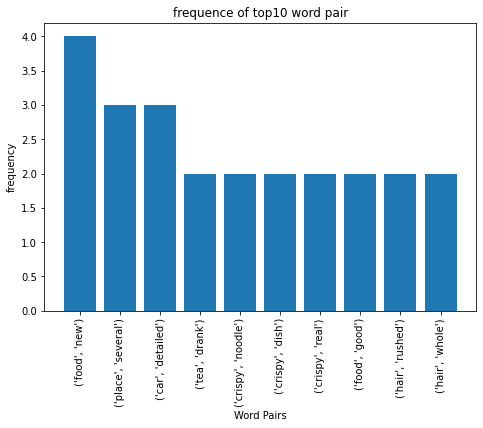

In [445]:
barplot_for_the_frequent_word_pairs(data_random_new_new,10)

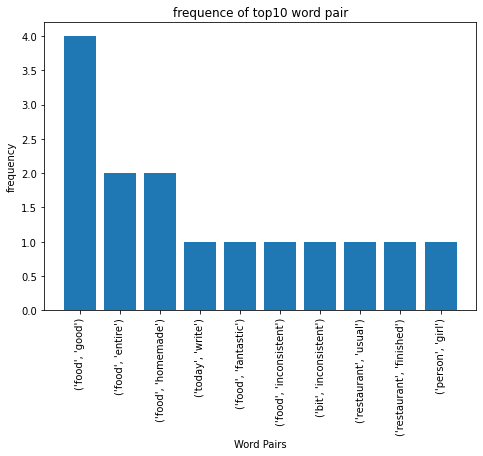

In [446]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_2,10)

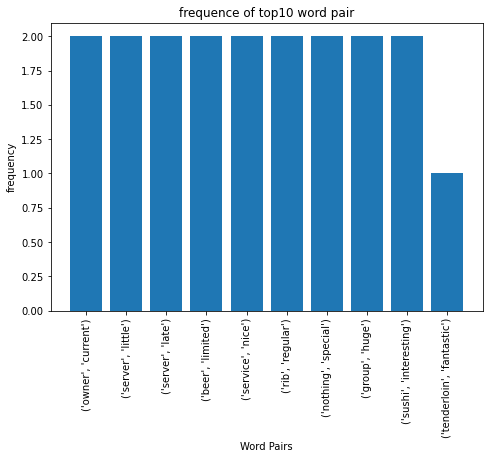

In [447]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_3,10)

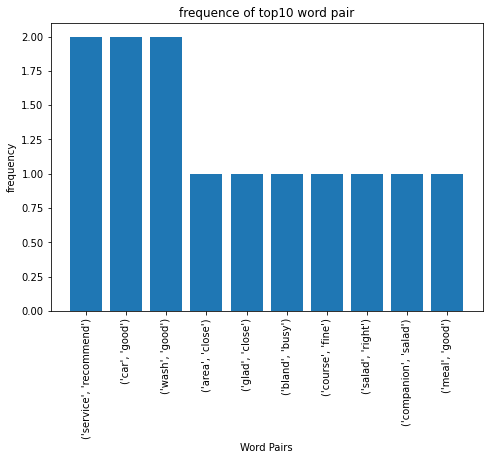

In [448]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_4,10)

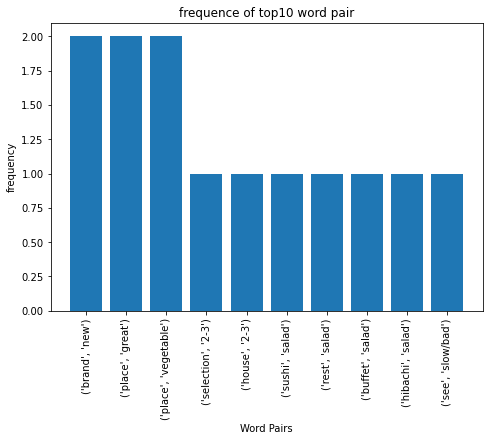

In [449]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_5,10)

# Wordclouds For Data Being Used For Each User Rating. 

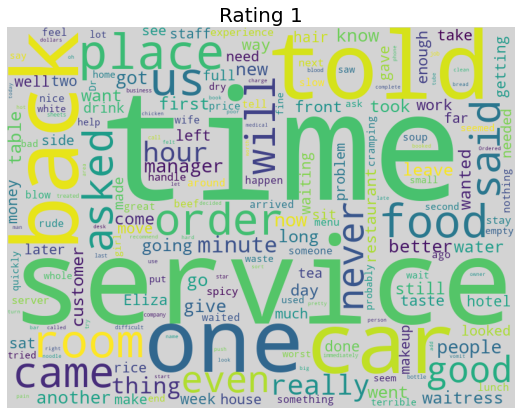

In [456]:
show_wordclouds(data_random_new_new,"Rating 1")

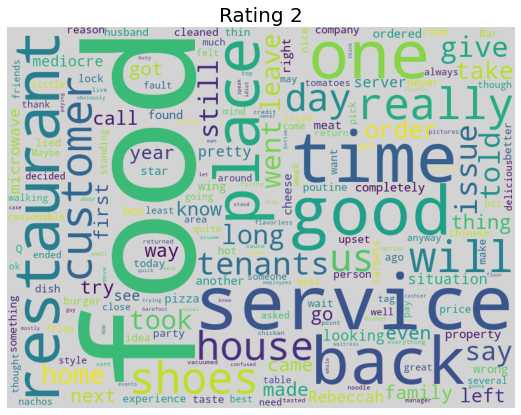

In [457]:
show_wordclouds(data_random_20_rating_2,"Rating 2")

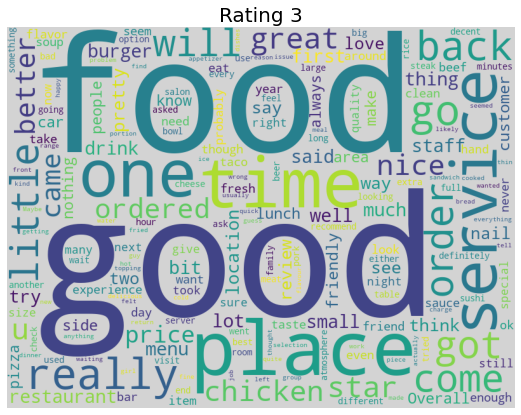

In [458]:
show_wordclouds(data_random_rating_3,"Rating 3")

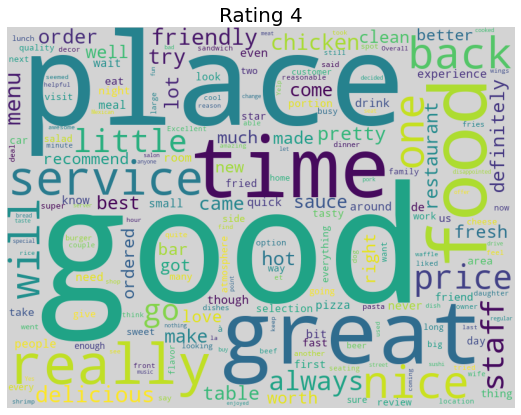

In [459]:
show_wordclouds(data_random_rating_4,"Rating 4")

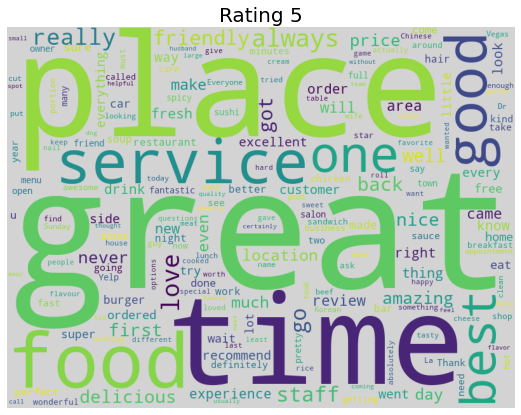

In [460]:
show_wordclouds(data_random_rating_5,"Rating 5")